In [ ]:
fastqc child1_OFFICIAL.fq child2_OFFICIAL.fq

jellyfish count -m 18 -C -s 100M -o child1_OFFICIAL.jf child1_OFFICIAL.fq
jellyfish histo child1_OFFICIAL.jf > child1_OFFICIAL.histo

jellyfish count -m 18 -C -s 100M -o child2_OFFICIAL.jf child2_OFFICIAL.fq
jellyfish histo child2_OFFICIAL.jf > child2_OFFICIAL.histo

jellyfish count -m 18 -C -s 100M -o child1.jf child1.fq
jellyfish histo child1.jf > child1.histo

jellyfish count -m 18 -C -s 100M -o child2.jf child2.fq
jellyfish histo child2.jf > child2.histo

Populating the interactive namespace from numpy and matplotlib


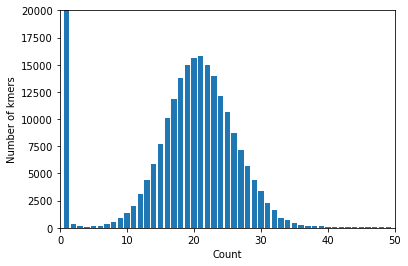

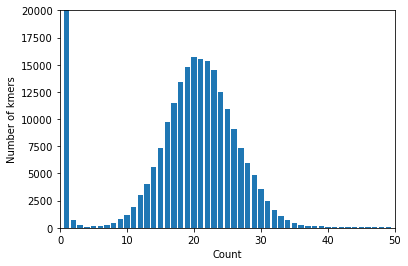

In [10]:
%pylab inline
import os

assert("child1_OFFICIAL.histo" in os.listdir("."))
assert("child2_OFFICIAL.histo" in os.listdir("."))
assert("child1.histo" in os.listdir("."))
assert("child2.histo" in os.listdir("."))


def GetKmerHistogram(histofile, max_xval=None, max_yval=None, plot=True):
    """ Plot a histogram of the kmer counts
    
    Parameters
    ----------
    histofile : str
       Path to a histogram file from jellyfish and 
    max_xval : int
       Maximum x-axis value. If set to None, use the full data range
    max_yval : int
       Maximum y-axis value. If set to None, use the full data range
    plot : bool
       If set to False, do not output the plot.
    Returns
    -------
    kmer_counts : dict[int]->int. Key=kmer count. Value=number of kmers
       seen that many times
    """
    kmer_counts = {} # Dictionary of count -> number of kmers
    # Read the histofile
    # Use its contents to update kmer_counts
    # your code here
    with open(histofile, 'r') as f:
        for line in f:
            key = int(line.split()[0]) # number of times a kmer occured
            value = int(line.split()[1]) # number of kmers in count 
            kmer_counts[key] = value
    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.bar(kmer_counts.keys(), kmer_counts.values())
        ax.set_xlabel("Count")
        ax.set_ylabel("Number of kmers")
        if max_xval is not None: ax.set_xlim(left=0, right=max_xval)
        if max_yval is not None: ax.set_ylim(bottom=0, top=max_yval)
    return kmer_counts

kmer_counts = GetKmerHistogram("child1_OFFICIAL.histo", max_xval=50, max_yval=20000)
kmer_counts = GetKmerHistogram("child1.histo", max_xval=50, max_yval=20000)

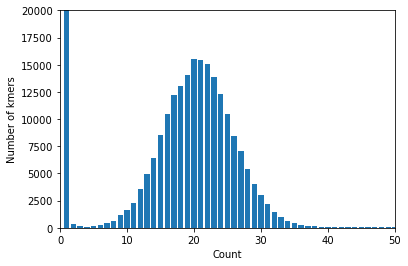

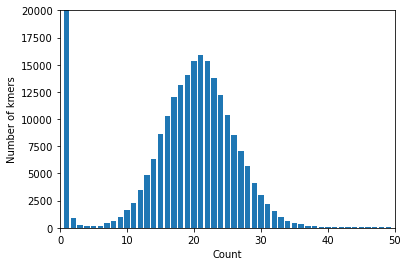

In [11]:
kmer_counts = GetKmerHistogram("child2_OFFICIAL.histo", max_xval=50, max_yval=20000)
kmer_counts = GetKmerHistogram("child2.histo", max_xval=50, max_yval=20000)